In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re

BUS_PATH = "../Singapore_bus"
dirs = os.listdir(BUS_PATH)
Bus_FileName_DirList = dirs
Bus_FileName_DirList
Bus_FileName_DirList = sorted(Bus_FileName_DirList)

weekday = [15, 16, 17, 18, 19, 20, 21]

In [2]:
import pandas as pd

# 生成日期时间索引，每天只取5:30到23:30
index_16th = pd.date_range(start='2017-01-16 05:30',
                           end='2017-01-16 23:30', freq='15T')
index_16th_data = pd.DataFrame(index=index_16th, columns=['num'], data=0)

index_17th = pd.date_range(start='2017-01-17 05:30',
                           end='2017-01-17 23:30', freq='15T')
index_17th_data = pd.DataFrame(index=index_17th, columns=['num'], data=0)

index_18th = pd.date_range(start='2017-01-18 05:30',
                           end='2017-01-18 23:30', freq='15T')
index_18th_data = pd.DataFrame(index=index_18th, columns=['num'], data=0)

index_19th = pd.date_range(start='2017-01-19 05:30',
                           end='2017-01-19 23:30', freq='15T')
index_19th_data = pd.DataFrame(index=index_19th, columns=['num'], data=0)

index_20th = pd.date_range(start='2017-01-20 05:30',
                           end='2017-01-20 23:30', freq='15T')
index_20th_data = pd.DataFrame(index=index_20th, columns=['num'], data=0)

index_21th = pd.date_range(start='2017-01-21 05:30',
                           end='2017-01-21 23:30', freq='15T')
index_21th_data = pd.DataFrame(index=index_21th, columns=['num'], data=0)

index_22th = pd.date_range(start='2017-01-22 05:30',
                           end='2017-01-22 23:30', freq='15T')
index_22th_data = pd.DataFrame(index=index_22th, columns=['num'], data=0)


# 合并索引
merged_index = index_16th.union(index_17th).union(index_18th).union(
    index_19th).union(index_20th).union(index_21th).union(index_22th)
# 打印结果

index_data = [index_16th_data, index_17th_data, index_18th_data,
              index_19th_data, index_20th_data, index_21th_data, index_22th_data,]
print(merged_index)

DatetimeIndex(['2017-01-16 05:30:00', '2017-01-16 05:45:00',
               '2017-01-16 06:00:00', '2017-01-16 06:15:00',
               '2017-01-16 06:30:00', '2017-01-16 06:45:00',
               '2017-01-16 07:00:00', '2017-01-16 07:15:00',
               '2017-01-16 07:30:00', '2017-01-16 07:45:00',
               ...
               '2017-01-22 21:15:00', '2017-01-22 21:30:00',
               '2017-01-22 21:45:00', '2017-01-22 22:00:00',
               '2017-01-22 22:15:00', '2017-01-22 22:30:00',
               '2017-01-22 22:45:00', '2017-01-22 23:00:00',
               '2017-01-22 23:15:00', '2017-01-22 23:30:00'],
              dtype='datetime64[ns]', length=511, freq=None)


/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/ipykernel_43328/3875662354.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  index_16th = pd.date_range(start='2017-01-16 05:30',
/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/ipykernel_43328/3875662354.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  index_17th = pd.date_range(start='2017-01-17 05:30',
/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/ipykernel_43328/3875662354.py:12: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  index_18th = pd.date_range(start='2017-01-18 05:30',
/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/ipykernel_43328/3875662354.py:16: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  index_19th = pd.date_range(start='2017-01-19 05:30',
/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/i

In [ ]:
# 第一版 185 84049
data_weekday_server = []
data_weekday_station = []


for day, index in zip(weekday, index_data):
    data_day = pd.read_csv(os.path.join(BUS_PATH, Bus_FileName_DirList[day]))
    data = data_day.loc[:, ['Bus_Service_Number',
                            'Boarding_stop_stn', 'Ride_start_date', 'Ride_start_time']]

    data = data[(data.Ride_start_time >= "05:30:00") &
                (data.Ride_start_time < "23:30:00")]

    data_temp = data.copy()

    data_temp = data.copy()
    data_temp['a'] = ' '
    data_temp.Ride_start_time = pd.to_datetime(
        data_temp.Ride_start_date+data_temp.a+data_temp.Ride_start_time)
    data_temp = data_temp.sort_values('Ride_start_time')
    data_temp.set_index('Ride_start_time', inplace=True)

    data_server_1 = data_temp.loc[data_temp['Bus_Service_Number'] == '127']
    data_server_1.loc[:, 'num'] = 1
    result_df = data_server_1.resample('15T').count()
    result_all = index.add(result_df, fill_value=0)
    data_list = result_all['num'].to_list()
    data_weekday_server.append(data_list)

    data_server_1 = data_temp.loc[data_temp['Boarding_stop_stn'] == 84049]
    data_server_1.loc[:, 'num'] = 1
    result_df = data_server_1.resample('15T').count()
    result_all = index.add(result_df, fill_value=0)
    data_list = result_all['num'].to_list()
    data_weekday_station.append(data_list)

    print(day)

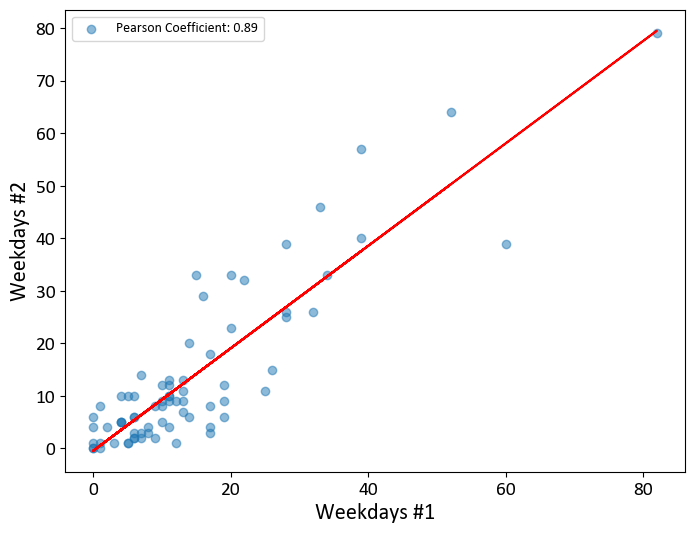

In [7]:
import numpy as np
from scipy.stats import pearsonr, linregress
time_series_server = np.array(data_weekday_server)
time_series_station = np.array(data_weekday_station)

x = time_series_server[0:1, :].reshape(-1)
y = time_series_server[1:2, :].reshape(-1)

# 计算皮尔逊相关系数
correlation, _ = pearsonr(x, y)

# 使用 scipy 的 linregress 计算回归线参数
slope, intercept, _, _, _ = linregress(x, y)
# 创建散点图
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.sans-serif'] = 'Calibri'

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Weekdays #1', fontsize=16)
plt.ylabel('Weekdays #2', fontsize=16)

plt.scatter(x, y, alpha=0.5, label=f'Pearson Coefficient: {correlation:.2f}')
# 添加回归线
plt.plot(x, intercept + slope * x, color='red')
# 添加图例
plt.legend()
plt.show()
fig.savefig('./Weekdays & Weekdays.svg', bbox_inches='tight')

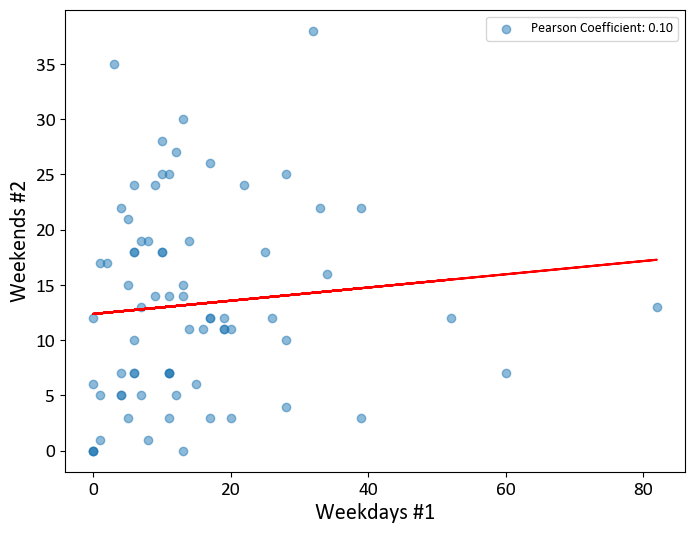

In [8]:
import numpy as np
from scipy.stats import pearsonr, linregress
time_series_server = np.array(data_weekday_server)
time_series_station = np.array(data_weekday_station)

x = time_series_server[0:1, :].reshape(-1)
y = time_series_server[5:6, :].reshape(-1)

# 计算皮尔逊相关系数
correlation, _ = pearsonr(x, y)

# 使用 scipy 的 linregress 计算回归线参数
slope, intercept, _, _, _ = linregress(x, y)
# 创建散点图
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.sans-serif'] = 'Calibri'

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Weekdays #1', fontsize=16)
plt.ylabel('Weekends #2', fontsize=16)

plt.scatter(x, y, alpha=0.5, label=f'Pearson Coefficient: {correlation:.2f}')
# 添加回归线
plt.plot(x, intercept + slope * x, color='red')
# 添加图例
plt.legend()
plt.show()
fig.savefig('./Weekdays & Weekends.svg', bbox_inches='tight')

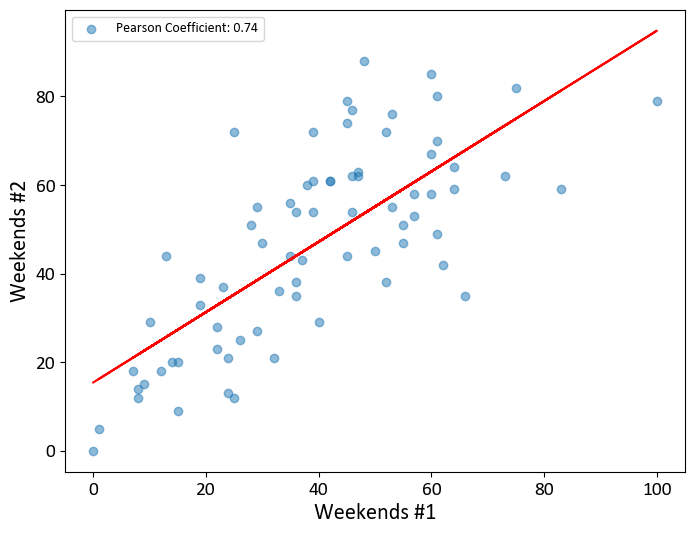

In [9]:
import numpy as np
from scipy.stats import pearsonr, linregress
time_series_server = np.array(data_weekday_server)
time_series_station = np.array(data_weekday_station)

x = time_series_station[6:7, :].reshape(-1)
y = time_series_station[5:6, :].reshape(-1)

# 计算皮尔逊相关系数
correlation, _ = pearsonr(x, y)

# 使用 scipy 的 linregress 计算回归线参数
slope, intercept, _, _, _ = linregress(x, y)
# 创建散点图
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.sans-serif'] = 'Calibri'

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Weekends #1', fontsize=16)
plt.ylabel('Weekends #2', fontsize=16)

plt.scatter(x, y, alpha=0.5, label=f'Pearson Coefficient: {correlation:.2f}')
# 添加回归线
plt.plot(x, intercept + slope * x, color='red')
# 添加图例
plt.legend()
plt.show()
fig.savefig('./Weekends & Weekends.svg', bbox_inches='tight')